In [1]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
print('done')


done


In [2]:

it = {
    'Technology': ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "INTC", "CSCO", "NVDA", "ADBE", "CRM", "IBM", "ORCL", "PYPL", "TXN", "AVGO", "QCOM", "AMAT", "MU", "AMD", "WDC"],
    'Healthcare': ["JNJ", "PFE", "MRK", "UNH", "AMGN", "GILD", "ABBV", "BMY", "LLY", "MDT", "ABT", "TMO", "BIIB", "VRTX", "REGN", "BSX", "ILMN", "ZTS", "HCA"],
    'Finance': ["JPM", "BAC", "WFC", "GS", "MS", "BLK", "AXP", "V", "MA", "SCHW", "BK", "COF", "DFS", "SPGI", "ICE", "NDAQ", "CME", "MCO", "BEN"],
    'Consumer Goods': ["PG", "KO", "PEP", "DIS", "MCD", "NKE", "HD", "COST", "CL", "KMB", "MDLZ", "GIS", "K", "CPB", "HSY", "TAP", "ADM", "CLX", "CAG", "CPB"],
    'Energy': ["XOM", "CVX", "BP", "CHK", "COP", "SLB", "KMI", "EPD", "PSX", "OXY", "VLO", "MPC", "HAL", "FANG", "E", "OKE", "NOV", "WMB", "APA"]
}
#references 
#https://pypi.org/project/yfinance/
#https://medium.com/@kasperjuunge/yfinance-10-ways-to-get-stock-data-with-python-6677f49e8282
#https://snyk.io/advisor/python/yfinance/example 
id = {}
for i, ts in it.items():
    d = []
    for t in ts:
        s = yf.Ticker(t)
        fs = s.quarterly_financials
        if fs is not None and not fs.empty:
            ft = fs.transpose()
            rd = ft.iloc[0]
            rd['Ticker'] = t
            d.append(rd)
    f_df = pd.DataFrame(d)
    f_df.set_index('Ticker', inplace=True)
    th = len(f_df) * 0.5
    f_df.dropna(axis=1, thresh=th, inplace=True)
    f_df.fillna(0, inplace=True)
    id[i] = f_df
print("DONE")

DONE


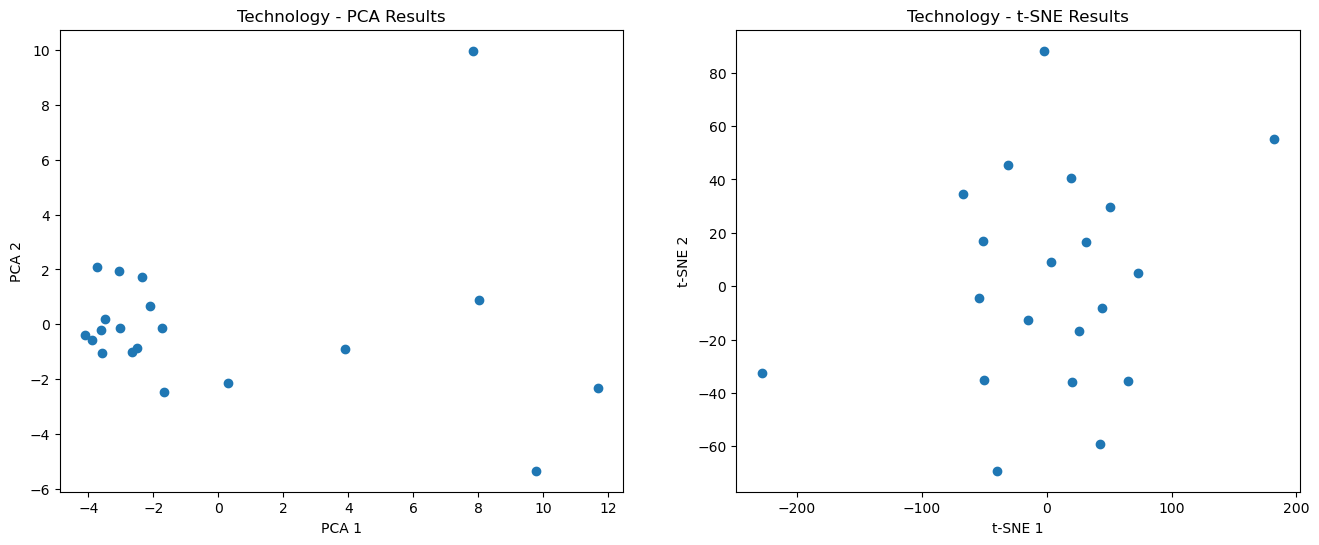

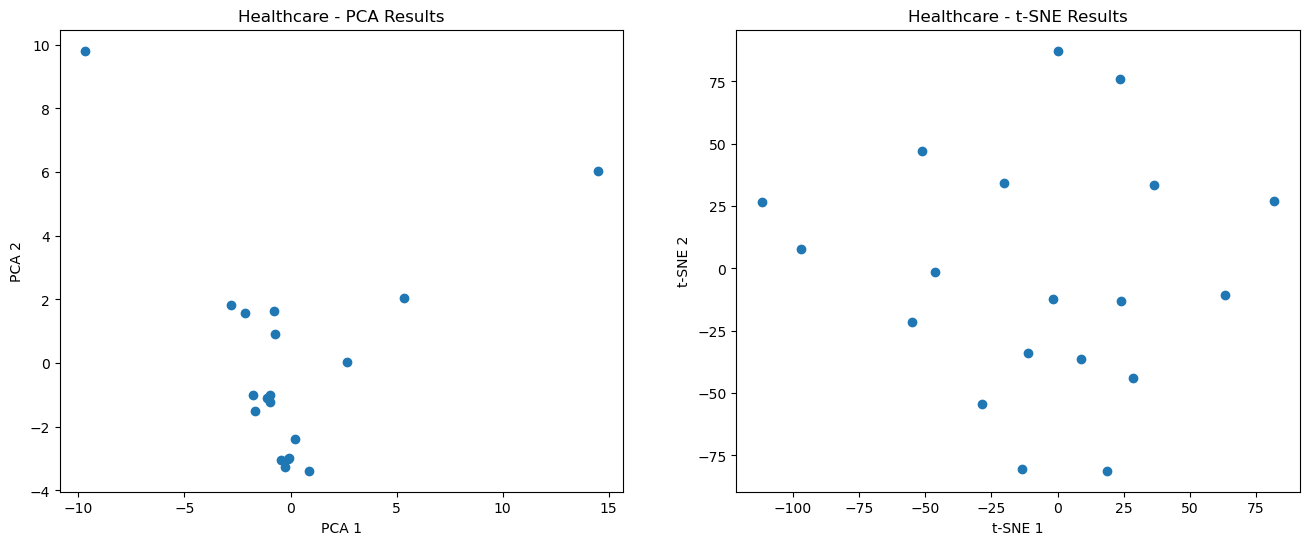

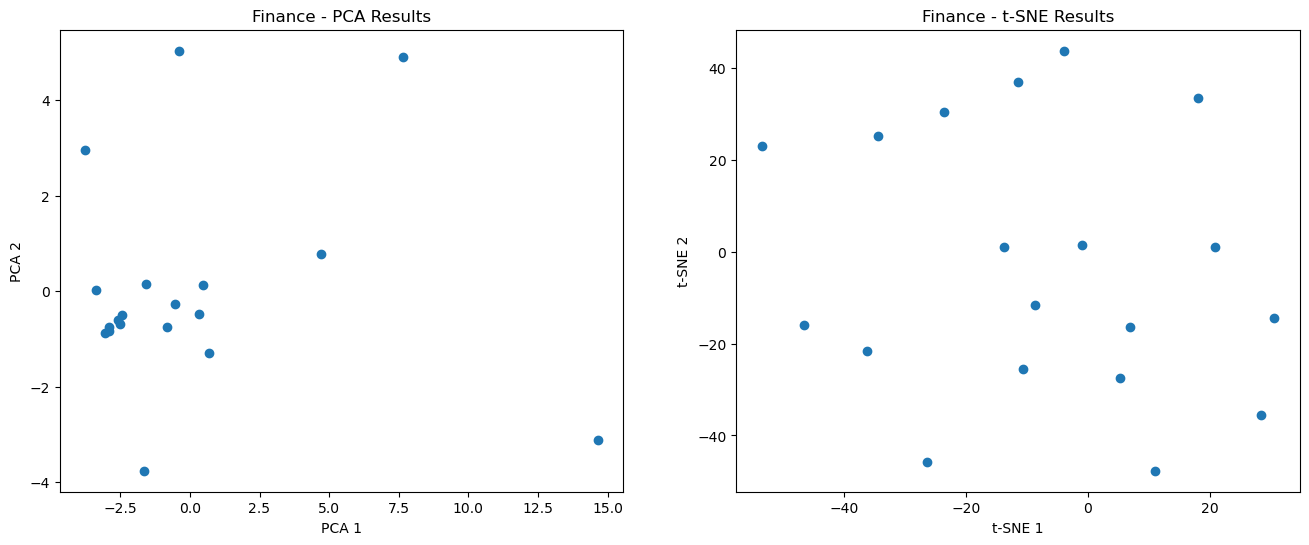

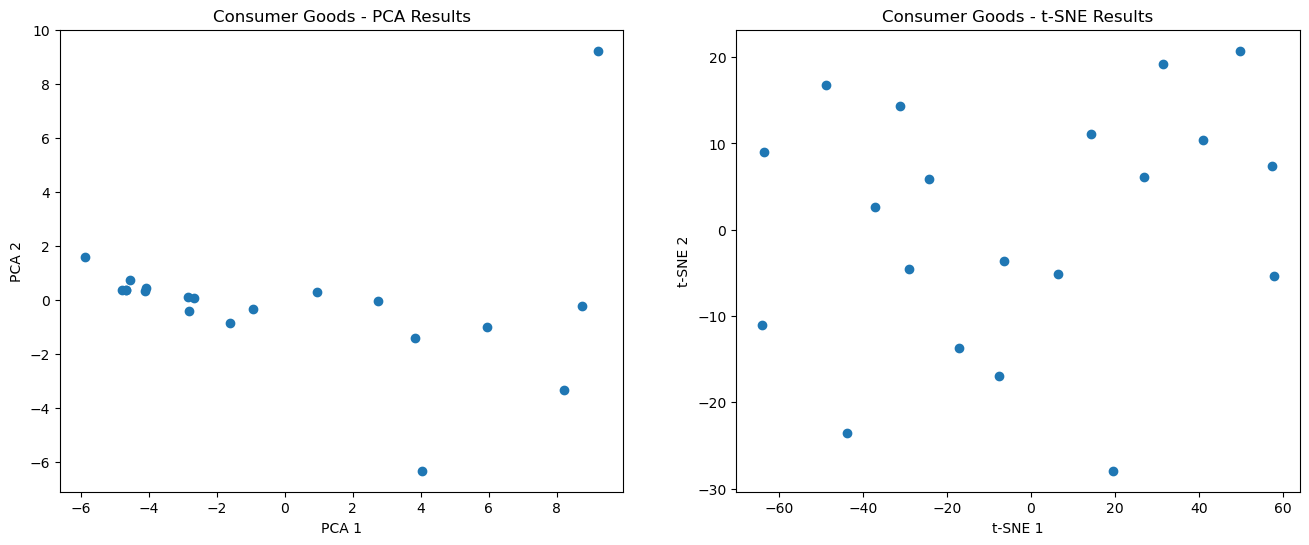

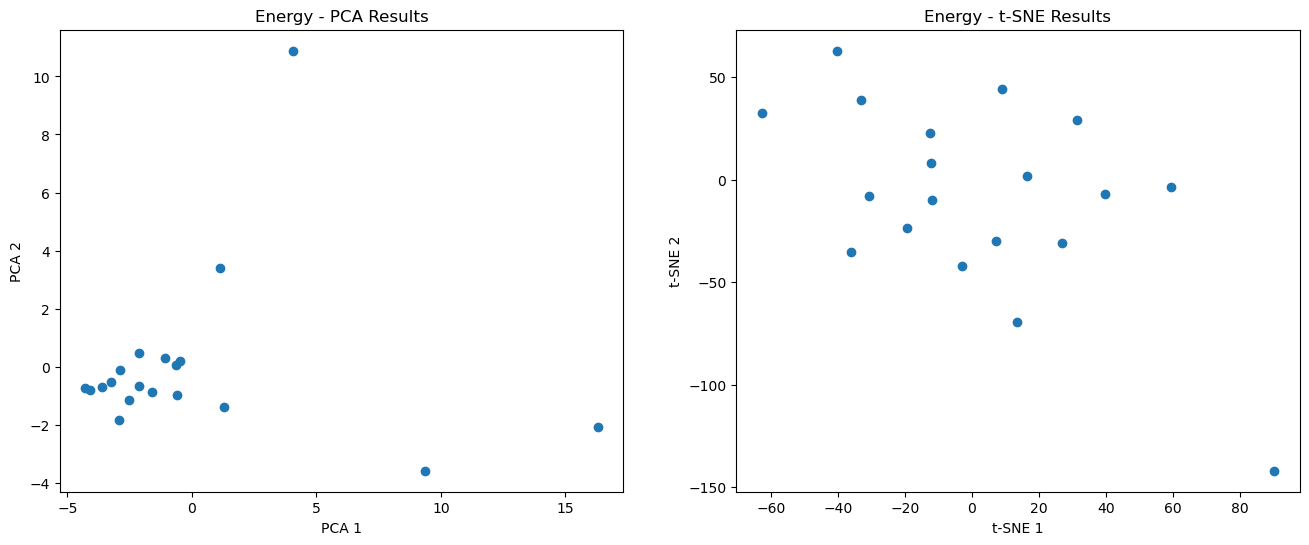

In [3]:
#https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
#https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py
#https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py 
for i, df in id.items():
    if not df.empty:
        sc = StandardScaler()
        sd = sc.fit_transform(df)
        p = PCA(n_components=2)
        pr = p.fit_transform(sd)
        pv = min(5, len(sd)-1)
        t = TSNE(n_components=2, verbose=0, perplexity=pv, n_iter=300)
        tr = t.fit_transform(sd)
        _, a = plt.subplots(1, 2, figsize=(16, 6))
        a[0].scatter(pr[:, 0], pr[:, 1])
        a[0].set_title(f'{i} - PCA Results')
        a[0].set_xlabel('PCA 1')
        a[0].set_ylabel('PCA 2')
        a[1].scatter(tr[:, 0], tr[:, 1])
        a[1].set_title(f'{i} - t-SNE Results')
        a[1].set_xlabel('t-SNE 1')
        a[1].set_ylabel('t-SNE 2')
        plt.show()

D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cole9\AppData\Local\Temp\ipykernel_104664\4286233651.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cl = plt.cm.get_cmap('viridis', k)


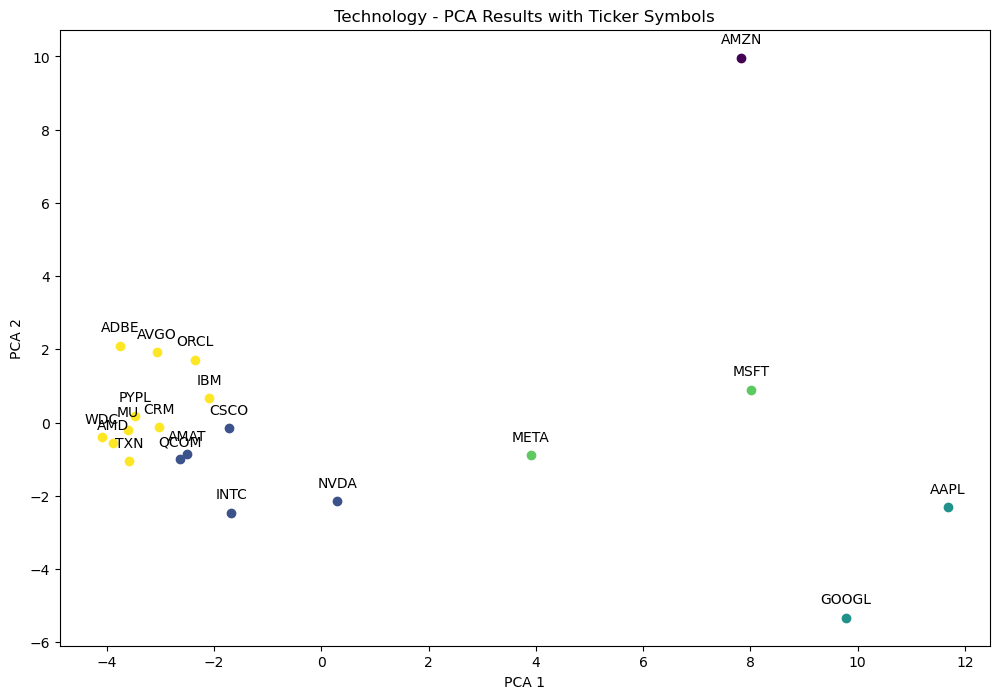

D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


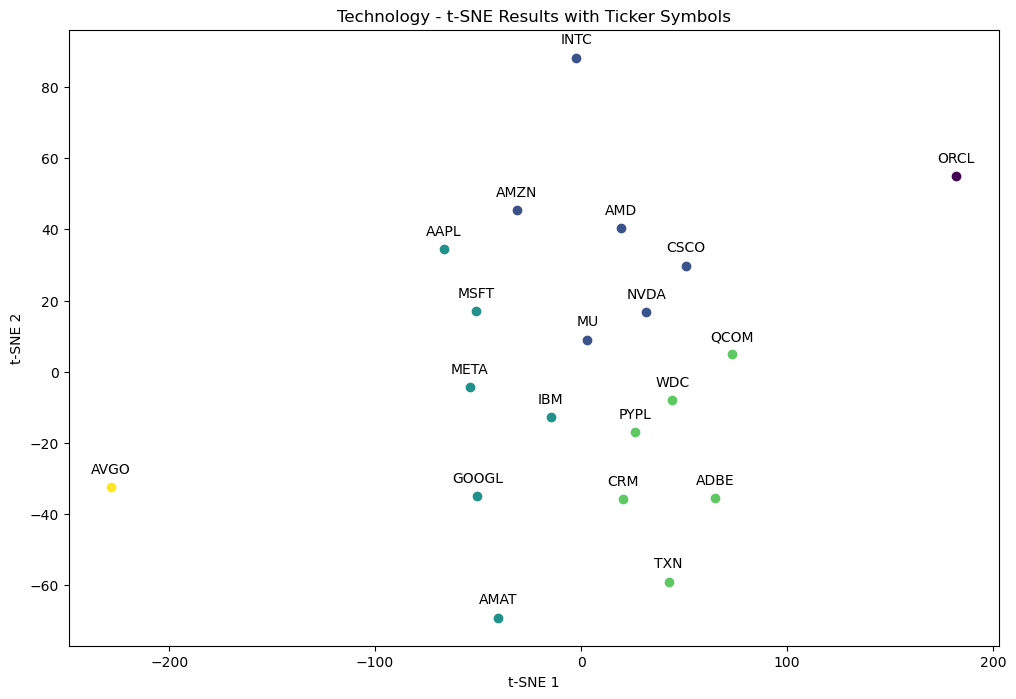

D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cole9\AppData\Local\Temp\ipykernel_104664\4286233651.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cl = plt.cm.get_cmap('viridis', k)


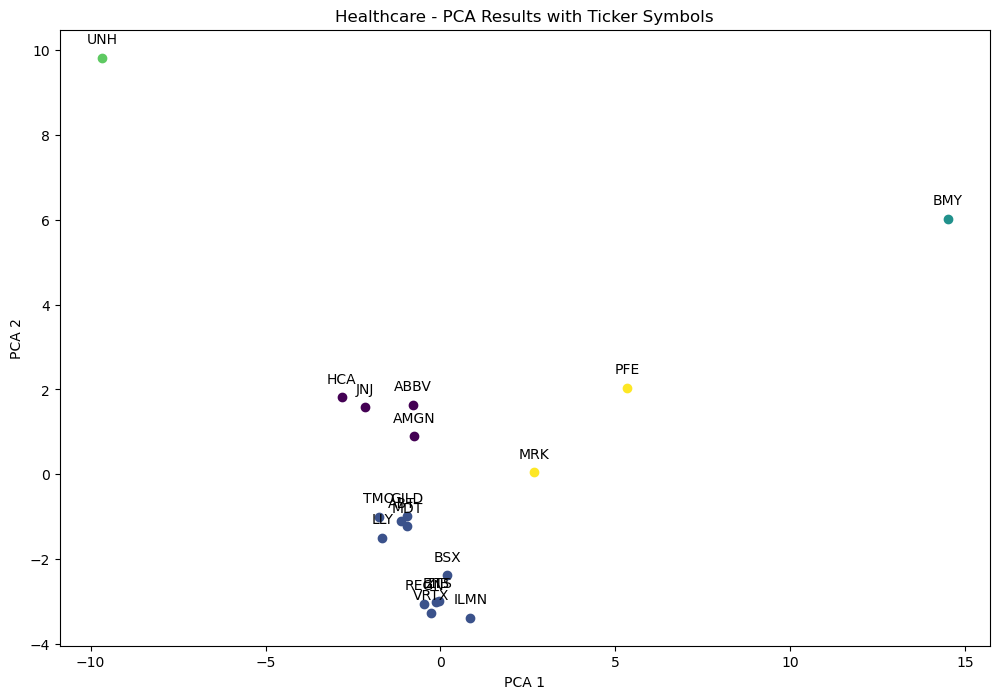

D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


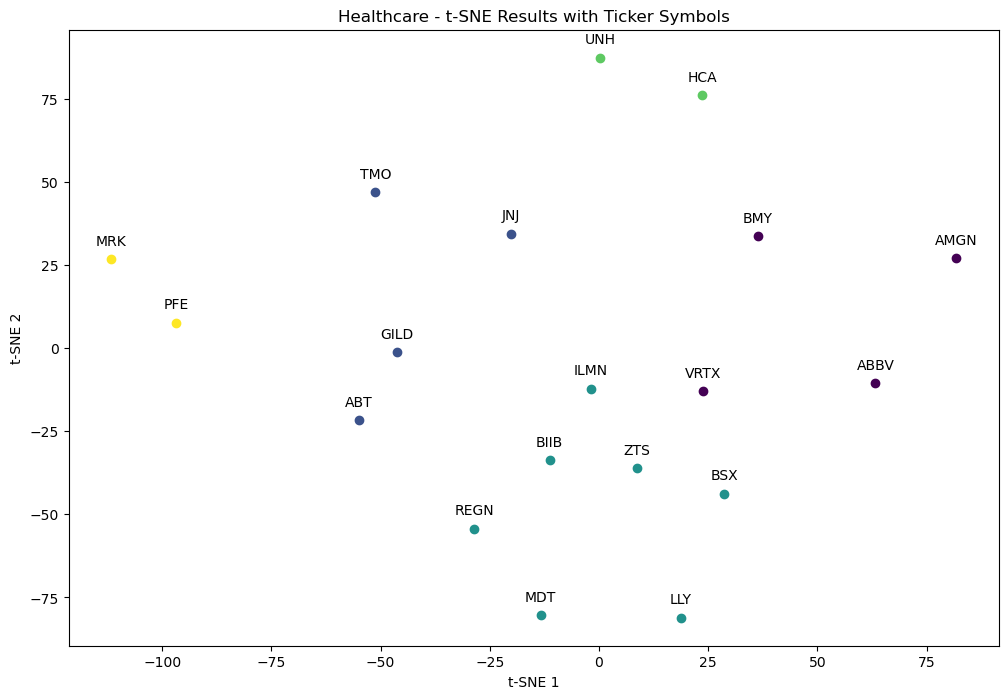

D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cole9\AppData\Local\Temp\ipykernel_104664\4286233651.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cl = plt.cm.get_cmap('viridis', k)


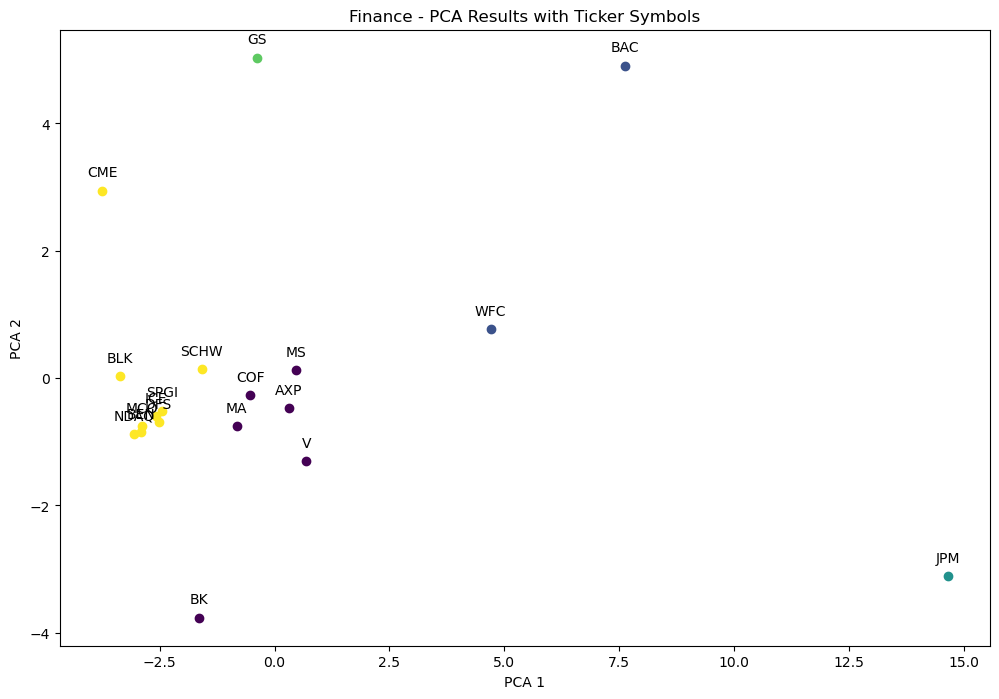

D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


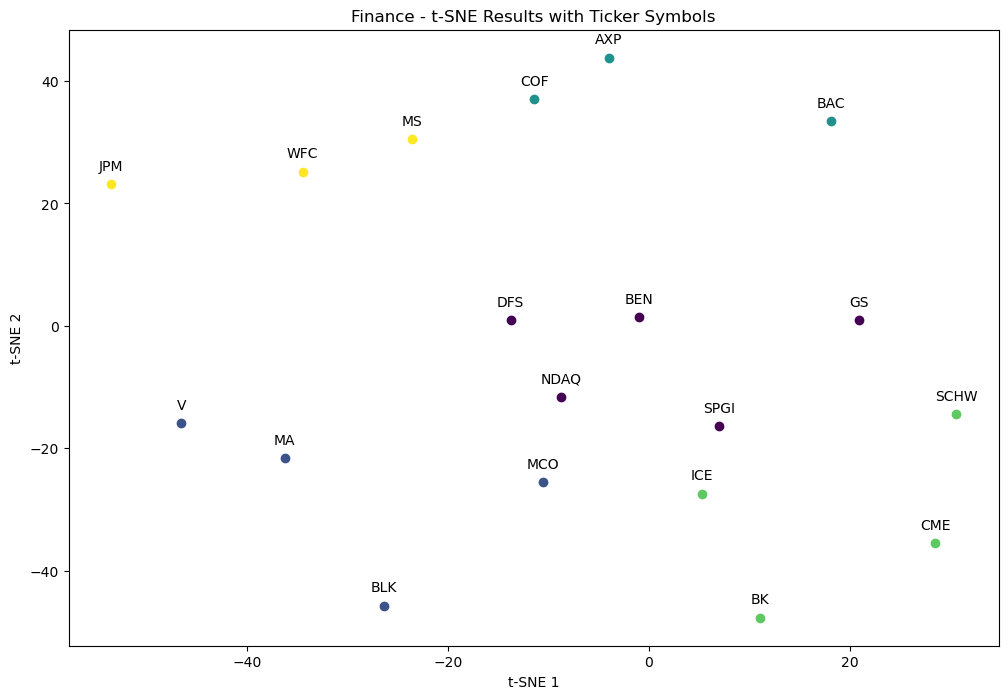

D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cole9\AppData\Local\Temp\ipykernel_104664\4286233651.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cl = plt.cm.get_cmap('viridis', k)


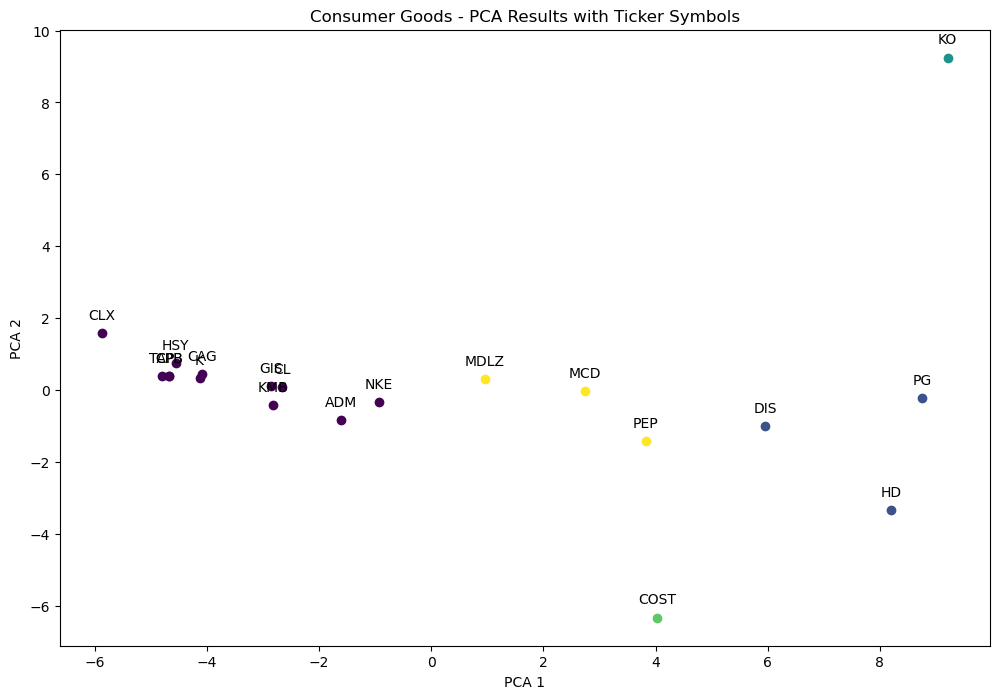

D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


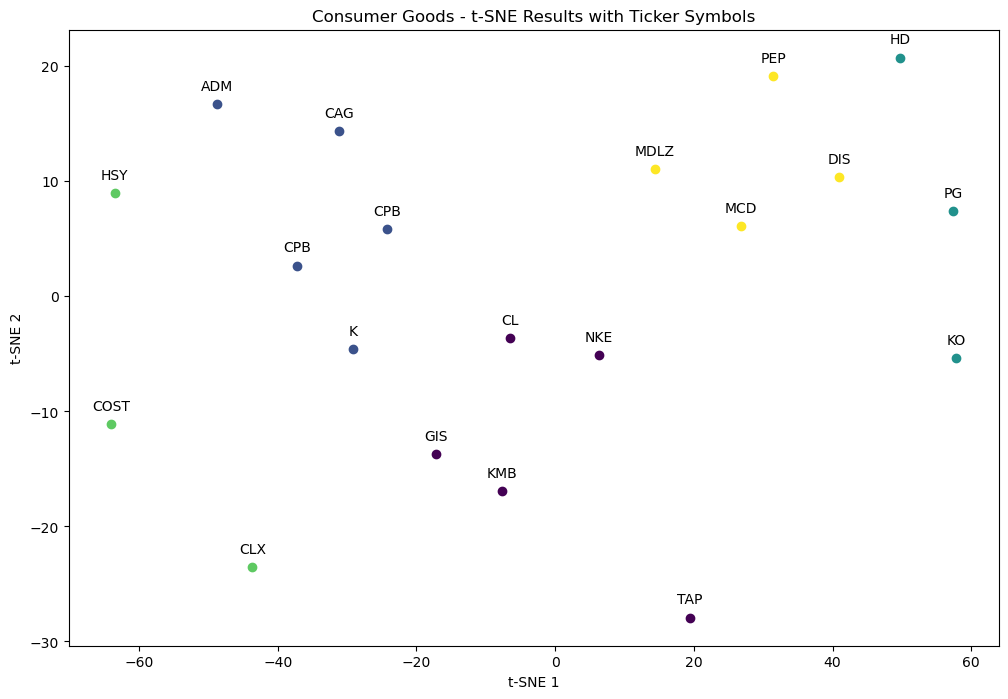

D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cole9\AppData\Local\Temp\ipykernel_104664\4286233651.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cl = plt.cm.get_cmap('viridis', k)


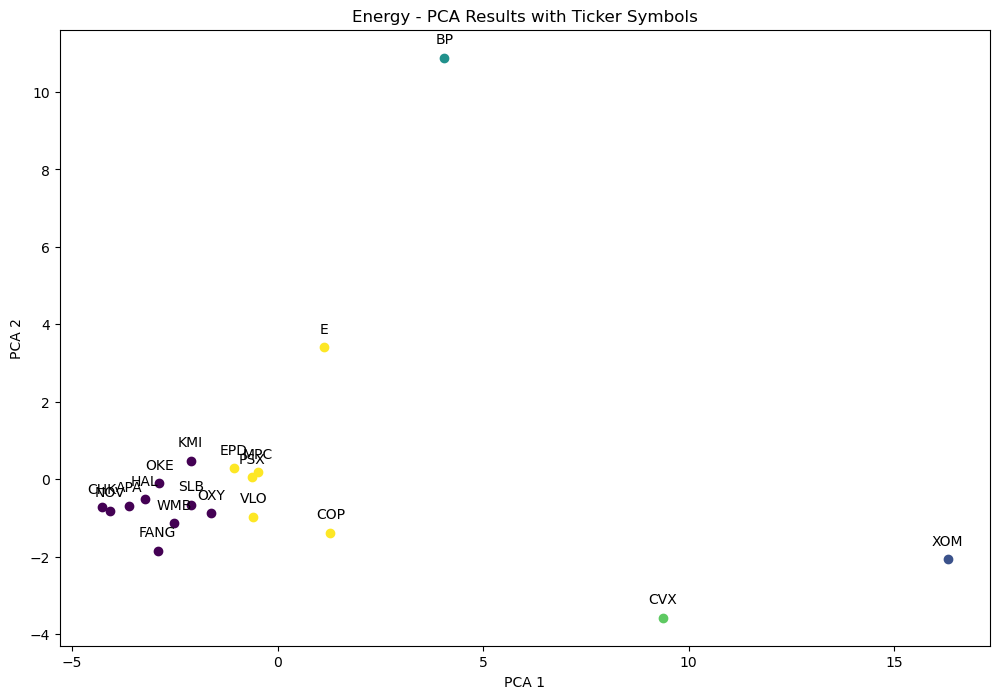

D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Desktop\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


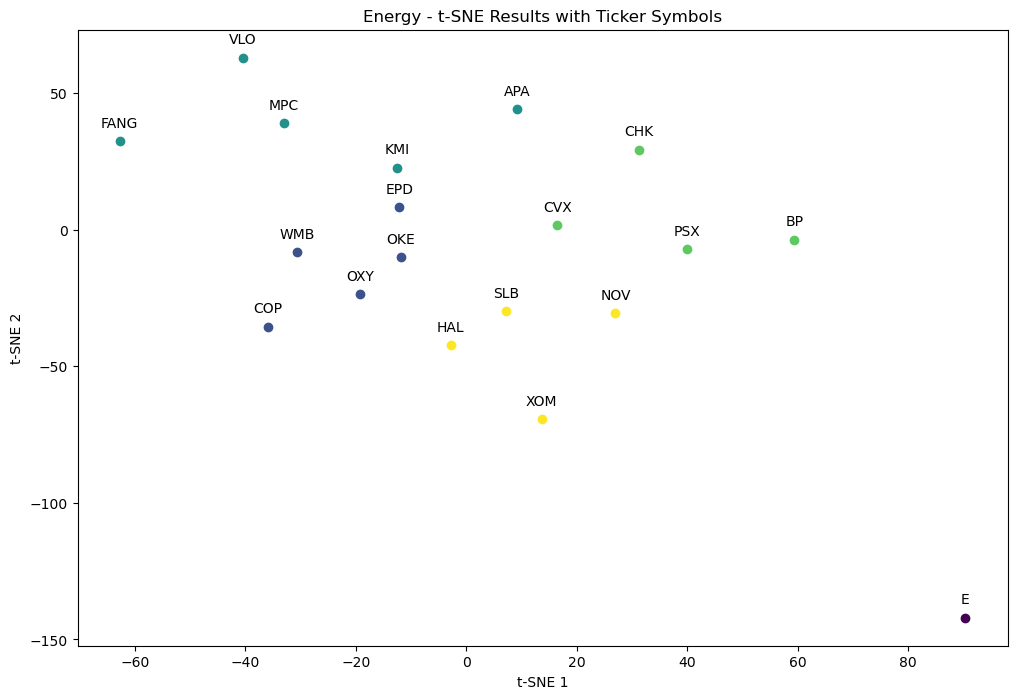

In [4]:

for i, df in id.items():
    if not df.empty:
        sc = StandardScaler()
        sd = sc.fit_transform(df)
        p = PCA(n_components=2)
        pr = p.fit_transform(sd)
        k = 5
        km = KMeans(n_clusters=k, random_state=42)
        pc = km.fit_predict(pr)
        df['Cluster'] = pc
        plt.figure(figsize=(12, 8))
        cl = plt.cm.get_cmap('viridis', k)
        for j in range(len(pr)):
            plt.scatter(pr[j, 0], pr[j, 1], color=cl(pc[j]))
            plt.annotate(df.index[j], (pr[j, 0], pr[j, 1]), textcoords="offset points", xytext=(0,10), ha='center')
        plt.title(f'{i} - PCA Results with Ticker Symbols')
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')
        plt.savefig(f"{i}_PCA.png")
        plt.show()
        t = TSNE(n_components=2, verbose=0, perplexity=min(5, len(sd)-1), n_iter=300)
        tr = t.fit_transform(sd)
        tc = km.fit_predict(tr)
        df['Cluster'] = tc
        plt.figure(figsize=(12, 8))
        for j in range(len(tr)):
            plt.scatter(tr[j, 0], tr[j, 1], color=cl(tc[j]))
            plt.annotate(df.index[j], (tr[j, 0], tr[j, 1]), textcoords="offset points", xytext=(0,10), ha='center')
        plt.title(f'{i} - t-SNE Results with Ticker Symbols')
        plt.xlabel('t-SNE 1')
        plt.ylabel('t-SNE 2')
        plt.savefig(f"{i}_tSNE.png")
        plt.show()




In [5]:
#https://scikit-learn.org/stable/modules/outlier_detection.html#isolation-forest
#https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py
from sklearn.ensemble import IsolationForest
for i, df in id.items():
    if len(df) > 1:
        sc = StandardScaler()
        sd = sc.fit_transform(df)
        p = PCA(n_components=2)
        pr = p.fit_transform(sd)
        if_p = IsolationForest(contamination=0.1)
        ap = if_p.fit_predict(pr)
        ap1 = np.where(ap == -1)[0]
        t = TSNE(n_components=2, verbose=0, perplexity=min(5, len(sd)-1), n_iter=300)
        tr = t.fit_transform(sd)
        if_t = IsolationForest(contamination=0.1)
        at = if_t.fit_predict(tr)
        at1 = np.where(at == -1)[0]
        if len(ap1) > 0:
            print(f"PCA Anomalies in {i}:")
            for ai in ap1:
                print(f"Ticker: {df.index[ai]} - PCA Coordinates: {pr[ai]}")
            print("\n")
        if len(at1) > 0:
            print(f"t-SNE Anomalies in {i}:")
            for ai in at1:
                print(f"Ticker: {df.index[ai]} - t-SNE Coordinates: {tr[ai]}")
            print("\n")


PCA Anomalies in Technology:
Ticker: GOOGL - PCA Coordinates: [ 9.77192518 -5.33453066]
Ticker: AMZN - PCA Coordinates: [7.86839558 9.99194139]


t-SNE Anomalies in Technology:
Ticker: AMZN - t-SNE Coordinates: [ 39.91518  -10.867778]
Ticker: AVGO - t-SNE Coordinates: [ 14.083035 -33.788605]


PCA Anomalies in Healthcare:
Ticker: UNH - PCA Coordinates: [-9.71925002  9.81605803]
Ticker: BMY - PCA Coordinates: [14.53415203  6.00218362]


t-SNE Anomalies in Healthcare:
Ticker: JNJ - t-SNE Coordinates: [34.164852 67.05811 ]
Ticker: ILMN - t-SNE Coordinates: [63.4697     7.7078056]


PCA Anomalies in Finance:
Ticker: JPM - PCA Coordinates: [14.73037004 -3.02744336]
Ticker: BAC - PCA Coordinates: [7.6011056  4.91669578]


t-SNE Anomalies in Finance:
Ticker: BAC - t-SNE Coordinates: [ 33.984303 -18.974358]
Ticker: BLK - t-SNE Coordinates: [-35.265522  16.90848 ]


PCA Anomalies in Consumer Goods:
Ticker: KO - PCA Coordinates: [9.15593704 9.29492894]
Ticker: COST - PCA Coordinates: [ 4.0965576